In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

## Оценка покупательных намерений клиентов онлайн магазина

Данный датасет состоит из данных о сессиях клиентов магазина. Датасет был сформирован так, чтобы каждая задокументированная сессия принадлежала одному уникальному пользователю, посетившему сайт магазина за год. Сделано это было, чтобы избежать каких-либо тенденций, возможно связанных с маркетинговыми кампаниями, акциями, отдельными пользователями или временными периодами.


Загружаем данные датасета


In [2]:
data = pd.read_csv('online_shoppers_intention.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(12330, 18)

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" - представляют собой информацию о количестве разных страниц, которые пользователь посетил за одну сессию, и общее время проведённое в соответствующей категории страниц
"BounceRates" - процент пользователей, которые выходят со страниц, не триггеря какие-либо другие запросы на сервер аналитики.
"Exit Rate" - отношение всех просмотров страницы к тем просмотрам, на которых сессия завершалась
"Page Value" - среднее значение для страницы, на которую заходил пользователь, перед совершением денежной транзакции
"Special Day" - определяет близость какого-либо "особого" дня(праздника) на момент сессии.
Например, значение в данном столбце будет принимать ненулевое значение с 2-го по 12-ое февраля и нулевое в другое время, если конечно не близок какой-то другой праздник. Пикового же значения(1) оно достигнет 8-го февраля. При вычислении значения в этом столбце принималась во внимание динамика покупки/доставки при заказе через интернет магазин.
Кроме того датасет включает в себя также информацию об операционной системе, браузере, регионе, типе трафика, типе посетителя, булевой столбец "Weekend" указывающий на то является ли день сессии выходным, а также месяц посещения сайта магазина.


Определяем столбцы с категорическими значениями

In [8]:
data['Month'] = data['Month'].astype('category')

In [9]:
data['Month'].dtype

CategoricalDtype(categories=['Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
                  'Oct', 'Sep'],
                 ordered=False)

In [10]:
data['OperatingSystems'] = data['OperatingSystems'].astype('category')

In [11]:
data['Browser'] = data['Browser'].astype('category')

In [12]:
data['Region'] = data['Region'].astype('category')

In [13]:
data['TrafficType'] = data['TrafficType'].astype('category')

In [14]:
data['VisitorType'] = data['VisitorType'].astype('category')

In [15]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Визуализируем данные и боремся с выбросами


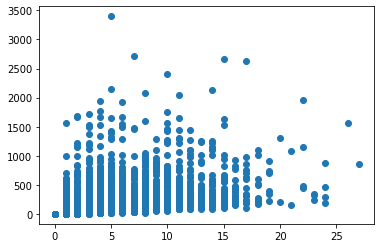

In [16]:
plt.scatter(data['Administrative'],data['Administrative_Duration'])
pass

In [17]:
data['Administrative'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005     0.000
0.010     0.000
0.050     0.000
0.900     7.000
0.950     9.000
0.990    14.000
0.995    16.000
0.999    21.671
Name: Administrative, dtype: float64

In [18]:
data['Administrative_Duration'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005       0.000000
0.010       0.000000
0.050       0.000000
0.900     224.887500
0.950     348.266369
0.990     830.587041
0.995    1174.343000
0.999    1759.738667
Name: Administrative_Duration, dtype: float64

In [19]:
data = data[(data['Administrative'] <= data['Administrative'].quantile(0.995))&(data['Administrative_Duration'] <= data['Administrative_Duration'].quantile(0.995))]
data.shape

(12221, 18)

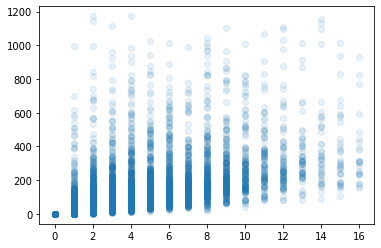

In [20]:
plt.scatter(data['Administrative'],data['Administrative_Duration'], alpha=0.1)
pass

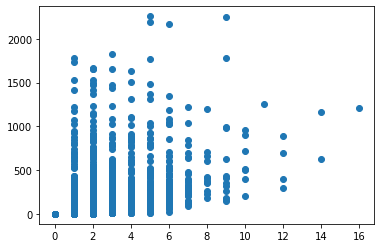

In [21]:
plt.scatter(data['Informational'],data['Informational_Duration'])
pass

In [22]:
data['Informational'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005     0.0
0.010     0.0
0.050     0.0
0.900     2.0
0.950     3.0
0.990     6.0
0.995     7.0
0.999    10.0
Name: Informational, dtype: float64

In [23]:
data['Informational_Duration'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005       0.000
0.010       0.000
0.050       0.000
0.900      66.500
0.950     187.000
0.990     685.850
0.995     943.175
0.999    1648.480
Name: Informational_Duration, dtype: float64

In [24]:
data = data[(data['Informational'] <= data['Informational'].quantile(0.995))&(data['Informational_Duration'] <= data['Informational_Duration'].quantile(0.995))]
data.shape

(12128, 18)

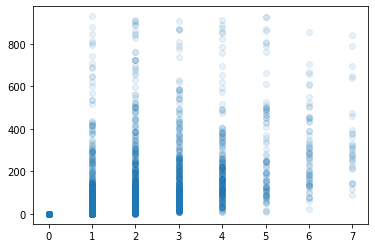

In [25]:
plt.scatter(data['Informational'],data['Informational_Duration'], alpha = 0.1)
pass

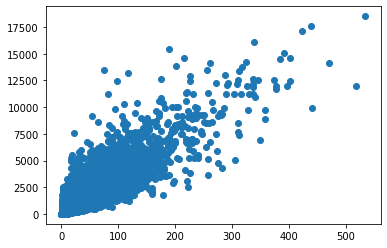

In [26]:
plt.scatter(data['ProductRelated'],data['ProductRelated_Duration'])
pass

In [27]:
data['ProductRelated'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005      1.000
0.010      1.000
0.050      1.000
0.900     71.000
0.950    104.000
0.990    201.460
0.995    256.730
0.999    376.619
Name: ProductRelated, dtype: float64

In [28]:
data['ProductRelated_Duration'].quantile([0.005,.01,.05,.9,.95,.99,.995,.999])

0.005        0.000000
0.010        0.000000
0.050        0.000000
0.900     2767.019520
0.950     4111.139343
0.990     8055.732677
0.995     9971.374142
0.999    13826.576182
Name: ProductRelated_Duration, dtype: float64

In [29]:
data = data[(data['ProductRelated'] <= data['ProductRelated'].quantile(0.995))&(data['ProductRelated_Duration'] <= data['ProductRelated_Duration'].quantile(0.990))]
data.shape

(11995, 18)

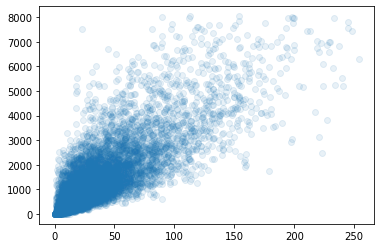

In [30]:
plt.scatter(data['ProductRelated'],data['ProductRelated_Duration'], alpha = 0.1)
pass

In [31]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,2.142226,69.186376,0.424510,23.856789,28.020175,1026.990461,0.022627,0.043688,5.873612,0.062376
std,3.031013,130.415865,1.047814,87.545044,32.273814,1270.726753,0.049074,0.049076,18.636887,0.200319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,177.816667,0.000000,0.014286,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.000000,574.533333,0.002985,0.025763,0.000000,0.000000
75%,3.000000,86.591667,0.000000,0.000000,36.000000,1373.169979,0.017503,0.050000,0.000000,0.000000
max,16.000000,1172.000000,7.000000,929.000000,254.000000,8041.588870,0.200000,0.200000,361.763742,1.000000


In [32]:
data.describe(include=['category'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,11995,11995,11995,11995,11995,11995
unique,10,8,13,9,20,3
top,May,2,2,1,2,Returning_Visitor
freq,3316,6376,7705,4625,3755,10230


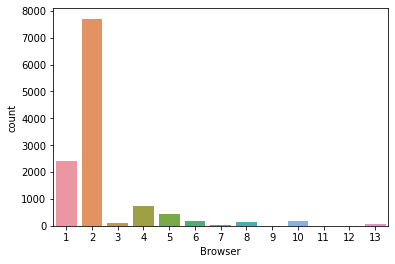

In [33]:
sns.countplot(x='Browser', data = data)

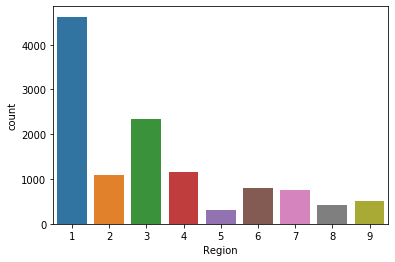

In [34]:
sns.countplot(x='Region', data = data)

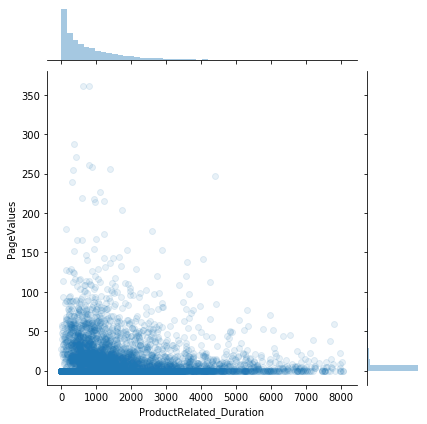

In [35]:
sns.jointplot(x = 'ProductRelated_Duration', y = 'PageValues', alpha = 0.1, data = data)
pass

Можно заметить, что эффект страниц на решение пользователя о покупке тем выше, чем меньше клиент проводит времени разглядывая страницы продукта. Скорее всего это связано с тем, что пользователи открывают страницу продукта не всегда с мыслью о сиюминутной покупке. Пользователи же которые уже знают о продукте меньше времени проводят на странице, принимая решение, а сразу оформляют заказ.

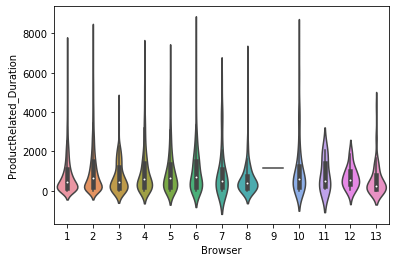

In [36]:
sns.violinplot(x = 'Browser', y = 'ProductRelated_Duration', data= data)

Построим матрицу корреляции для количественных признаков

In [37]:
corr_mattr = data.corr()
corr_mattr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.000000,0.674541,0.337964,0.247191,0.407304,0.352597,-0.229777,-0.324658,0.100586,-0.097635,0.027679,0.134887
Administrative_Duration,0.674541,1.000000,0.268196,0.200580,0.267230,0.282320,-0.168822,-0.243810,0.079769,-0.081169,0.026100,0.105894
Informational,0.337964,0.268196,1.000000,0.648959,0.316445,0.312172,-0.119226,-0.167449,0.055307,-0.048309,0.036744,0.090590
Informational_Duration,0.247191,0.200580,0.648959,1.000000,0.225549,0.243902,-0.084624,-0.123075,0.049130,-0.036842,0.026556,0.088921
ProductRelated,0.407304,0.267230,0.316445,0.225549,1.000000,0.832809,-0.246055,-0.349161,0.084530,-0.013792,0.011056,0.166889
ProductRelated_Duration,0.352597,0.282320,0.312172,0.243902,0.832809,1.000000,-0.237105,-0.321895,0.089946,-0.030352,0.003754,0.178777
BounceRates,-0.229777,-0.168822,-0.119226,-0.084624,-0.246055,-0.237105,1.000000,0.913331,-0.120114,0.071928,-0.046480,-0.150631
ExitRates,-0.324658,-0.243810,-0.167449,-0.123075,-0.349161,-0.321895,0.913331,1.000000,-0.175737,0.101331,-0.061889,-0.206972
PageValues,0.100586,0.079769,0.055307,0.049130,0.084530,0.089946,-0.120114,-0.175737,1.000000,-0.063729,0.010765,0.504790
SpecialDay,-0.097635,-0.081169,-0.048309,-0.036842,-0.013792,-0.030352,0.071928,0.101331,-0.063729,1.000000,-0.016378,-0.081135


Удобно воспользоваться визуальным образом данной матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

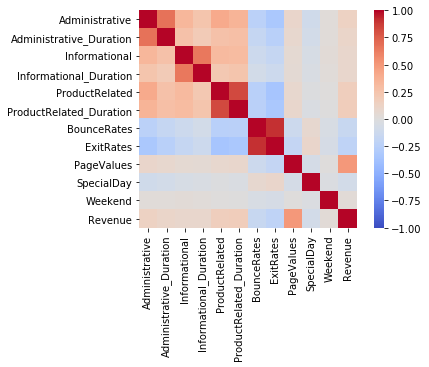

In [38]:
sns.heatmap(corr_mattr, square = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

Очевидна корреляция между парами "Administrative" - "Administrative_Duration", "Informational" - "Informational_Duration", "Product Related" - "Product Related Duration". Также высокий коэффициент корреляции наблюдается между пользователями сразу же покидающими сайт магазина и прокликавшими пару страниц. Видно что эти значения совсем не коррелируют с "PageValue", которые в свою очередь напрямую влияют на денежные транзакции в онлайн магазине.

In [39]:
data['Browser'].dtype.name

'category'

In [40]:
data['Administrative_Duration'].dtype.name

'float64'

In [41]:
data['Administrative'].dtype.name

'int64'

In [42]:
data['BounceRates'].dtype.name

'float64'

In [43]:
data['Revenue'].dtype.name

'bool'

In [44]:
categorical_columns = [c for c in data.columns if ((data[c].dtype.name == 'category') | (data[c].dtype.name == 'bool'))]
numerical_columns   = [c for c in data.columns if ((data[c].dtype.name != 'category') & (data[c].dtype.name != 'bool'))]
print(categorical_columns)
print(numerical_columns)

['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


Пропусков в датасете не наблюдается

In [45]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [46]:
data.describe(include=['category'])

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,11995,11995,11995,11995,11995,11995
unique,10,8,13,9,20,3
top,May,2,2,1,2,Returning_Visitor
freq,3316,6376,7705,4625,3755,10230


Категориальные признаки следует разбить на множество бинарных признаков

In [47]:
binary_columns    = [c for c in categorical_columns if data.describe(include=['category','bool'])[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data.describe(include=['category','bool'])[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Weekend', 'Revenue'] ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']


In [48]:
data['Weekend'].unique()

array([False,  True])

In [49]:
data['Weekend'].dtype.name

'bool'

In [50]:
data['Month'].unique()

[Feb, Mar, May, Oct, June, Jul, Aug, Nov, Sep, Dec]
Categories (10, object): [Feb, Mar, May, Oct, ..., Aug, Nov, Sep, Dec]

In [51]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18',

In [52]:
len(data_nonbinary.columns)

63

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению.

In [53]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,2.142226,69.186376,0.424510,23.856789,28.020175,1026.990461,0.022627,0.043688,5.873612,0.062376
std,3.031013,130.415865,1.047814,87.545044,32.273814,1270.726753,0.049074,0.049076,18.636887,0.200319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,177.816667,0.000000,0.014286,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.000000,574.533333,0.002985,0.025763,0.000000,0.000000
75%,3.000000,86.591667,0.000000,0.000000,36.000000,1373.169979,0.017503,0.050000,0.000000,0.000000
max,16.000000,1172.000000,7.000000,929.000000,254.000000,8041.588870,0.200000,0.200000,361.763742,1.000000


In [54]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04
mean,3.392738e-15,-2.429884e-15,5.054426e-15,-2.200778e-15,-3.556509e-16,-2.006343e-15,9.052062e-15,1.611556e-14,-9.768482e-16,1.661900e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.067689e-01,-5.305058e-01,-4.051387e-01,-2.725087e-01,-8.682015e-01,-8.081914e-01,-4.610828e-01,-8.901963e-01,-3.151606e-01,-3.113837e-01
25%,-7.067689e-01,-5.305058e-01,-4.051387e-01,-2.725087e-01,-6.513074e-01,-6.682584e-01,-4.610828e-01,-5.991043e-01,-3.151606e-01,-3.113837e-01
50%,-3.768463e-01,-4.921669e-01,-4.051387e-01,-2.725087e-01,-3.414587e-01,-3.560617e-01,-4.002543e-01,-3.652383e-01,-3.151606e-01,-3.113837e-01
75%,2.829991e-01,1.334599e-01,-4.051387e-01,-2.725087e-01,2.472539e-01,2.724264e-01,-1.044098e-01,1.286258e-01,-3.151606e-01,-3.113837e-01
max,4.571994e+00,8.456131e+00,6.275433e+00,1.033917e+01,7.001956e+00,5.520147e+00,3.614424e+00,3.185092e+00,1.909601e+01,4.680661e+00


Собираем всё воедино

In [55]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(11995, 75)


In [56]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,1.199500e+04,...,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,3.392738e-15,-2.429884e-15,5.054426e-15,-2.200778e-15,-3.556509e-16,-2.006343e-15,9.052062e-15,1.611556e-14,-9.768482e-16,1.661900e-14,...,0.001000,0.003168,0.000250,0.000083,0.000834,0.001334,0.016173,0.140225,0.006920,0.852855
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.031615,0.056198,0.015813,0.009131,0.028863,0.036500,0.126147,0.347235,0.082899,0.354265
min,-7.067689e-01,-5.305058e-01,-4.051387e-01,-2.725087e-01,-8.682015e-01,-8.081914e-01,-4.610828e-01,-8.901963e-01,-3.151606e-01,-3.113837e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.067689e-01,-5.305058e-01,-4.051387e-01,-2.725087e-01,-6.513074e-01,-6.682584e-01,-4.610828e-01,-5.991043e-01,-3.151606e-01,-3.113837e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,-3.768463e-01,-4.921669e-01,-4.051387e-01,-2.725087e-01,-3.414587e-01,-3.560617e-01,-4.002543e-01,-3.652383e-01,-3.151606e-01,-3.113837e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.829991e-01,1.334599e-01,-4.051387e-01,-2.725087e-01,2.472539e-01,2.724264e-01,-1.044098e-01,1.286258e-01,-3.151606e-01,-3.113837e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.571994e+00,8.456131e+00,6.275433e+00,1.033917e+01,7.001956e+00,5.520147e+00,3.614424e+00,3.185092e+00,1.909601e+01,4.680661e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Разбиваем данные на обучающую и тестовые выборки

In [57]:
X = data.drop('Revenue', axis = 1)
y = data['Revenue']
feature_names = X.columns

In [58]:
type(feature_names)

pandas.core.indexes.base.Index

In [59]:
feature_names

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'Region_1', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'Traff

In [60]:
X = X.to_numpy()
y = np.array(y.astype(int))

In [61]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
print(X.shape)
print(y.shape)
N, d = X.shape

(11995, 74)
(11995,)


In [63]:
type(X)

numpy.ndarray

In [64]:
type(y)

numpy.ndarray

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8396 3599


Сначала попробуем воспользоваться методом ближайших соседей

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [67]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

Получили достаточно значительный процент ошибок

In [68]:
err_test

0.12058905251458739

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_predict))

[[2999   41]
 [ 393  166]]


In [70]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

Попытаемся подобрать параметры, которые помогут нам увеличть точность предсказания.

In [71]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.11636642261195307 20


Незначительное улучшение, меньше полупроцента. И всё же лучше, чем было.

In [72]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [73]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [74]:
err_test

0.1197554876354543

In [75]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.11350643163411148 0.12003334259516532


Попробуем воспользоваться алгоритмом случайного леса

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
err_test  = np.mean(y_test  != y_pred)

In [77]:
err_test

0.10113920533481523

In [78]:

clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
err_test  = np.mean(y_test  != y_pred)

In [79]:
err_test

0.10252848013337038

In [80]:

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
err_test  = np.mean(y_test  != y_pred)

In [81]:
err_test

0.09974993053626008

In [82]:

clf=RandomForestClassifier(n_estimators=500)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
err_test  = np.mean(y_test  != y_pred)

In [83]:
err_test

0.09836065573770492

Точность предсказаний улучшилась. Но используя алгоритм случайного леса, можно попробовать сделать точность ещё выше исключив малозначащие признаки, которые могут мешать с обучением.

In [84]:
np.sum(clf.feature_importances_)

1.0

In [85]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]])) 

Feature ranking:
 1. feature 'PageValues' (0.322156)
 2. feature 'ProductRelated_Duration' (0.081809)
 3. feature 'ExitRates' (0.079800)
 4. feature 'ProductRelated' (0.070830)
 5. feature 'Administrative_Duration' (0.052866)
 6. feature 'BounceRates' (0.050745)
 7. feature 'Administrative' (0.042207)
 8. feature 'Informational_Duration' (0.025392)
 9. feature 'Month_Nov' (0.020789)
10. feature 'Informational' (0.017061)
11. feature 'Weekend' (0.011384)
12. feature 'Region_1' (0.010987)
13. feature 'TrafficType_2' (0.010673)
14. feature 'Region_3' (0.009036)
15. feature 'Browser_2' (0.008759)
16. feature 'OperatingSystems_2' (0.008712)
17. feature 'VisitorType_Returning_Visitor' (0.008580)
18. feature 'VisitorType_New_Visitor' (0.008435)
19. feature 'Month_May' (0.007259)
20. feature 'TrafficType_1' (0.007187)
21. feature 'OperatingSystems_3' (0.006943)
22. feature 'Region_4' (0.006876)
23. feature 'OperatingSystems_1' (0.006489)
24. feature 'Month_Dec' (0.006310)
25. feature 'Region_2

(-1, 20)

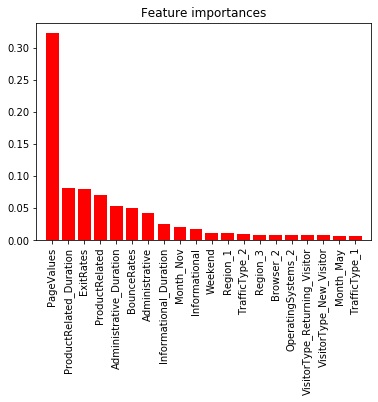

In [86]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

"PageValue" показал себя как самый важный признак, оставляем его и все другие признаки до признака месяца ноября. 

In [116]:
X2= data[['PageValues', 'ProductRelated_Duration','ExitRates', 'ProductRelated','BounceRates','Administrative_Duration','Administrative','Informational','Informational_Duration']]
y2 = data['Revenue']
X2 = X2.to_numpy()
y2 = np.array(y2.astype(int))
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 13)

In [117]:
clf=RandomForestClassifier(n_estimators=500)
clf.fit(X2_train,y2_train)
y2_pred=clf.predict(X2_test)
err2_test  = np.mean(y2_test  != y2_pred)
err2_test

0.11004585243851604

Однако, неудача. Попытка исключить возможные лишние признаки привела к падению точности. Делаем очевидный вывод, что они влияли на точность предсказаний и лишними не являлись.

### Вывод

Как итог выполненной лабораторной рабоыт была решена задача классификации. Было предсказано решение покупателя о совершении денежных транзакций в интернет магазине с помощью метода ближайших соседей и случайного леса. Минимальное значение ошибки при использовании параметра количества соседей равного 20. Алгоритм случайного леса смог построить более точное предсказание, однако попытка сконцентрировать работу алгоритма на важных признаков, не принесла успеха.

# Нейронные сети

Обучаем классификатор

In [114]:
X = data.drop('Revenue', axis = 1)
Y = data['Revenue']
X = X.to_numpy()
Y = np.array(Y.astype(int))

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 63)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8996 2999


In [118]:
from sklearn.neural_network import MLPClassifier

In [120]:
mlp_model = MLPClassifier(hidden_layer_sizes=(150,),
                          solver='adam',
                          activation='relu',
                          random_state=13,
                          max_iter=1000)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=13, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [122]:
%%time
mlp_model.fit(X_train, y_train)

Wall time: 39 s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=13, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Проверяем качество классификатора

In [123]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [124]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0005558025789239662 0.11670556852284095


In [125]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.999444197421076

In [126]:
accuracy_score(y_test, y_test_pred)

0.883294431477159

Подбор гипер параметров

In [127]:
alpha_arr = np.logspace(-3, 2, 20)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, 
                              hidden_layer_sizes=(100,),
                              solver='adam',
                              activation='relu',
                              random_state=63,
                              max_iter=1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

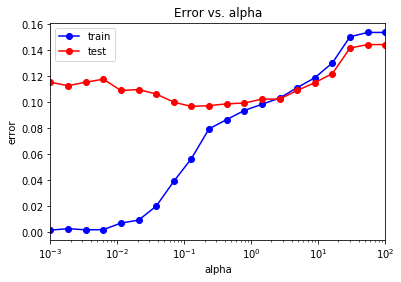

In [128]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

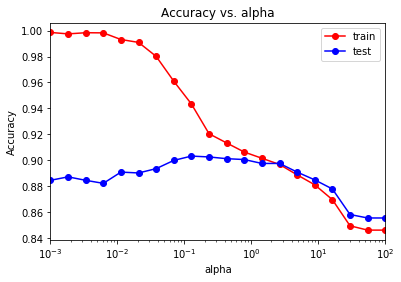

In [129]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label='train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

Минимальное значение ошибки:

In [130]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.001445086705202312 0.09669889963321107


Оптимальное значение alpha:

In [132]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.1274275]


Классификатор при найденном оптимальном значении alpha:

In [133]:
alpha_opt = alpha_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,), random_state = 63)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.061805246776345045
0.09736578859619874


D:\AnacondaPython\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [134]:
accuracy_score(y_train, y_train_pred)

0.938194753223655

In [135]:
accuracy_score(y_test, y_test_pred)

0.9026342114038013

In [136]:
neuron_arr = np.linspace(10, 500, 10).astype(int)
test_error = []
train_error = []
test_acc = []
train_acc = []

for count in neuron_arr:
  mlp_model = MLPClassifier(alpha=alpha_opt, hidden_layer_sizes=(count,), max_iter=1000, random_state=63)
  mlp_model.fit(X_train, y_train)
  
  y_train_pred = mlp_model.predict(X_train)
  y_test_pred = mlp_model.predict(X_test)
  
  test_error.append(np.mean(y_test != y_test_pred))
  train_error.append(np.mean(y_train != y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))

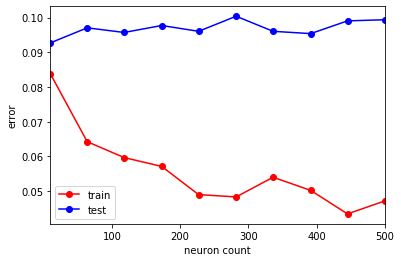

In [137]:
plt.plot(neuron_arr, train_error, 'r-o', label='train')
plt.plot(neuron_arr, test_error, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('error')
plt.legend()

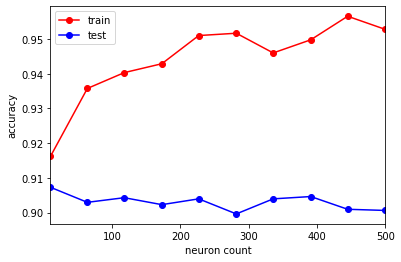

In [138]:
plt.plot(neuron_arr, train_acc, 'r-o', label='train')
plt.plot(neuron_arr, test_acc, 'b-o', label='test')
plt.xlim([np.min(neuron_arr), np.max(neuron_arr)])
plt.xlabel('neuron count')
plt.ylabel('accuracy')
plt.legend()

Минимальное значение ошибки

In [139]:
min_train_error = np.min(train_error)
min_test_error = np.min(test_error)
print(min_train_error, min_test_error)

0.04346376167185416 0.09269756585528509


In [141]:
neuron_opt = neuron_arr[test_error == min_test_error]
print(neuron_opt[0])

10


Классификатор при оптимальном значении параметра регуляризации и числа нейронов

In [142]:
neuron_opt = neuron_opt[0]
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neuron_opt,), random_state = 63)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0838150289017341
0.09269756585528509


In [143]:
accuracy_score(y_train, y_train_pred)

0.9161849710982659

In [144]:
accuracy_score(y_test, y_test_pred)

0.9073024341447149

Выводы

- На графике alpha vs error наблюдаем переобучение.
- При оптимальном alpha ошибка на тестовой выборке выше, чем у обучающей.
- На графике Acc vs neuron наблюдаем, что при увеличении нейронов точность на обучающей выборке растёт, на тестовой же незначительно падает.
- При оптимальном числе нейронов (10) точность тестововой выборки ниже, .